# Feature Scaling
Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. It is performed during the data pre-processing to handle highly varying magnitudes or values or units. If feature scaling is not done, then a machine learning algorithm tends to weigh greater values, higher and consider smaller values as the lower values, regardless of the unit of the values.
# Why do you need to apply feature scaling 
We need to perform Feature Scaling when we are dealing with Gradient Descent Based algorithms (Linear and Logistic Regression, Neural Network) and Distance-based algorithms (KNN, K-means, SVM) as these are very sensitive to the range of the data points

# Techniques to perform Feature Scaling
Consider the two most important ones:

<b>1] Normalization<b/>
    
<b>2] Standardization<b/>

# Normalization
Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.
This technique re-scales a feature or observation value with distribution value between 0 and 1.
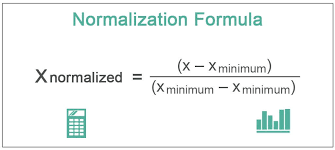


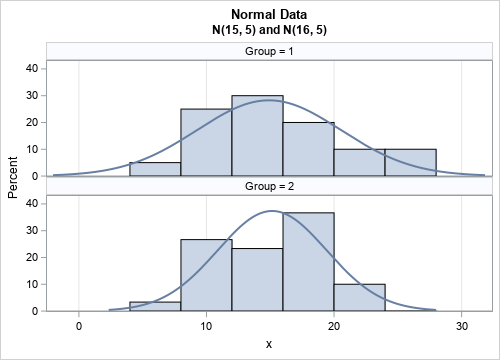
Here, Xmax and Xmin are the maximum and the minimum values of the feature respectively.

When the value of X is the minimum value in the column, the numerator will be 0, and hence X’ is 0
On the other hand, when the value of X is the maximum value in the column, the numerator is equal to the denominator and thus the value of X’ is 1
If the value of X is between the minimum and the maximum value, then the value of X’ is between 0 and 1

# Standardization

Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.
It is a very effective technique which re-scales a feature value so that it has distribution with 0 mean value and variance equals to 1.
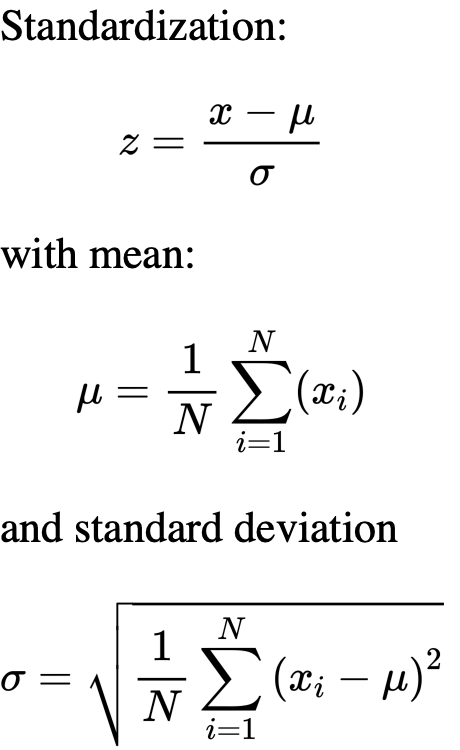

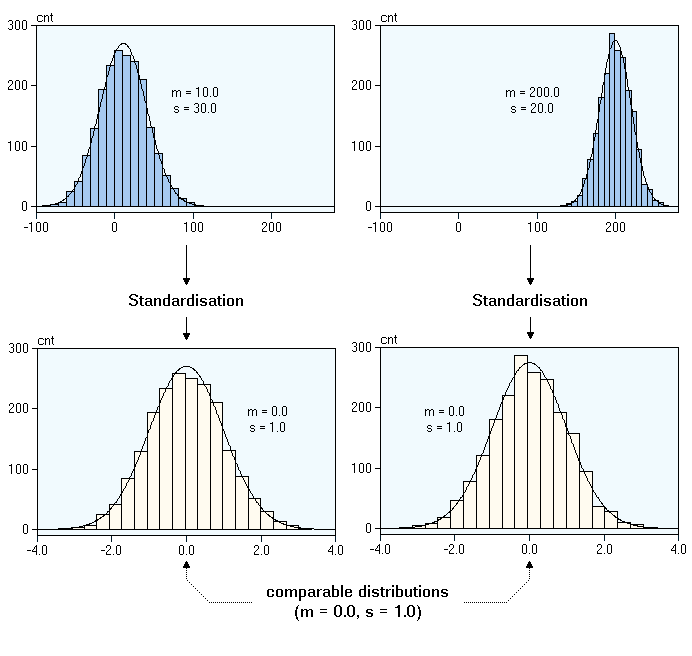




# Implementing Feature Scaling 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('C:/Users/deshm/Desktop/dataml/AAPL.csv')
                 
df

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.0500,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.1000,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.9000,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.0500,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.3200,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.960,316.500,310.3241,313.17,33843125,314.960000,316.500000,310.324100,313.170000,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.140,318.520,313.0100,315.03,25432385,313.140000,318.520000,313.010000,315.030000,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.230,319.520,316.2000,316.68,27876215,319.230000,319.520000,316.200000,316.680000,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.850,320.890,315.8700,318.66,25672211,316.850000,320.890000,315.870000,318.660000,25672211,0.0,1.0


In [3]:
df.columns

Index(['Unnamed: 0', 'symbol', 'date', 'close', 'high', 'low', 'open',
       'volume', 'adjClose', 'adjHigh', 'adjLow', 'adjOpen', 'adjVolume',
       'divCash', 'splitFactor'],
      dtype='object')

In [4]:
df2=df[['close', 'high', 'low', 'open',
       'volume']]
df2


,close,high,low,open,volume
0,132.045,132.260,130.0500,130.34,45833246
1,131.780,131.950,131.1000,131.86,30733309
2,130.280,131.450,129.9000,131.23,50884452
3,130.535,131.390,130.0500,131.20,32112797
4,129.960,130.655,129.3200,129.86,33667627
...,...,...,...,...,...
1253,314.960,316.500,310.3241,313.17,33843125
1254,313.140,318.520,313.0100,315.03,25432385
1255,319.230,319.520,316.2000,316.68,27876215
1256,316.850,320.890,315.8700,318.66,25672211


C:\Users\deshm\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


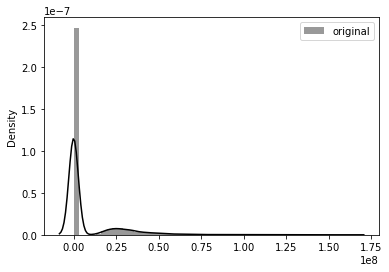

In [18]:
sns.distplot(df2,color='black',label='original')

plt.legend()

# Normalization

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
scale=MinMaxScaler()

In [8]:
df3=scale.fit_transform(df[['close', 'high', 'low', 'open',
       'volume']])
df3

array([[0.17607447, 0.17186045, 0.17350778, 0.17185703, 0.22852181],
       [0.17495567, 0.17054789, 0.17799726, 0.17833255, 0.12841898],
       [0.16862282, 0.16843086, 0.17286643, 0.17564862, 0.26200805],
       ...,
       [0.96635143, 0.96473029, 0.96942877, 0.96570528, 0.10947829],
       [0.9563033 , 0.97053095, 0.96801779, 0.9741405 , 0.09486716],
       [0.96491598, 0.96350241, 0.96579442, 0.96182848, 0.06025227]])

C:\Users\deshm\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


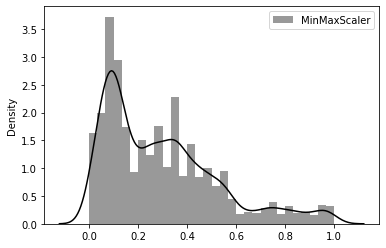

In [16]:
sns.distplot(df3,color='black',label='MinMaxScaler')

plt.legend()

# Standardization

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
Stand = StandardScaler()

In [14]:
df4=Stand.fit_transform(df[['close', 'high', 'low', 'open',
       'volume']])
df4

array([[-0.62783971, -0.64321905, -0.64285248, -0.65750369,  0.62654466],
       [-0.63250289, -0.64861249, -0.62409729, -0.63064392, -0.24708587],
       [-0.65889824, -0.65731158, -0.64553179, -0.64177658,  0.9187901 ],
       ...,
       [ 2.66603573,  2.6147645 ,  2.68217447,  2.63529253, -0.41238752],
       [ 2.62415511,  2.63860001,  2.67627998,  2.67028092, -0.53990363],
       [ 2.66005279,  2.60971903,  2.6669917 ,  2.61921201, -0.84199921]])

C:\Users\deshm\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


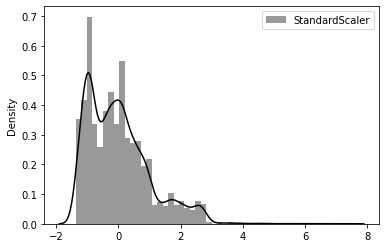

In [17]:
sns.distplot(df4,color='black',label='StandardScaler')

plt.legend()